# SoupX

# Koth el al's data

In [ ]:
library(Seurat)
library(SoupX)
library(DropletUtils)
library(ggplot2)
library(DoubletFinder)
library(knitr)
library(SeuratDisk)

# Data ReadIn

In [7]:
raw1 = Read10X_h5('../../rev_MI/GSE138181/GSM4101380_587680_45_raw_gene_bc_matrices_h5.h5')
raw2 = Read10X_h5('../../rev_MI/GSE138181/GSM4101381_587680_46_raw_gene_bc_matrices_h5.h5')
raw3 = Read10X_h5('../../rev_MI/GSE138181/GSM4101382_587680_47_raw_gene_bc_matrices_h5.h5')

In [8]:
colnames(raw1)<-paste0(colnames(raw1),'-0')
colnames(raw2)<-paste0(colnames(raw2),'-1')
colnames(raw3)<-paste0(colnames(raw3),'-2')

In [9]:
raw = cbind(raw1,raw2,raw3)

In [43]:
filter = readRDS('../10X_Analysis/Dissertation/write/Koth_raw.seurat.rds')

In [44]:
meta = read.csv('../10X_Analysis/Dissertation/Files/Koth_raw_obs.csv',row.names = 1)

In [45]:
length(setdiff(rownames(meta),colnames(raw)))

[1] 0

In [46]:
raw = raw[intersect(rownames(filter),rownames(raw)),]
filtered = raw[intersect(rownames(filter),rownames(raw)),rownames(meta)]

In [47]:
ncol(filtered)

[1] 12838

In [48]:
raw.matrix = raw
filt.matrix = filtered

In [49]:
if(any(is.na(raw.matrix)) | any(is.na(filt.matrix))) {
  print("NA values found. Please clean your data.")
} else {
  # Proceed
  sc <- SoupChannel(raw.matrix, filt.matrix, calcSoupProfile = FALSE)
}

In [50]:
sc = estimateSoup(sc)

In [51]:
sc = setClusters(sc, setNames(meta$CT_new2, rownames(meta)))

In [52]:
sc

Channel with 20450 genes and 12838 cells



In [53]:
length(intersect(rownames(meta),colnames(sc$toc)))

[1] 12838

In [54]:
sc = setDR(sc, meta[colnames(sc$toc), c("UMAP1","UMAP2")])

In [55]:
head(meta)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,⋯,Treatment,RFP,db_scores,predicted_db,Citrine,DsRedEx,Title,CT_new2,UMAP1,UMAP2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>
AAACCTGCAATCAGAA-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,Thrombocytes,4.720377,2.241624
AAACCTGCAGCTGCAC-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,T-cells,3.979563,-4.669714
AAACCTGCATCCTTGC-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,Thrombocytes,6.233833,3.897861
AAACCTGCATTGGTAC-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,Endocardium,13.057301,5.147261
AAACCTGTCTCAAACG-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,Fibroblasts,11.709134,16.870630
AAACGGGAGAGACGAA-1-0,GSM4101380,na,adult,Healthy,0,Tg(kdrl:Hsa.HRAS-mCherry);TgBAC(runx1P2:Citrine),ventricle,GSE138181,mCherry+Citrine+ cells,WT,⋯,NA,NA,NA,NaN,NA,NA,NA,Endocardium,11.279815,4.966515


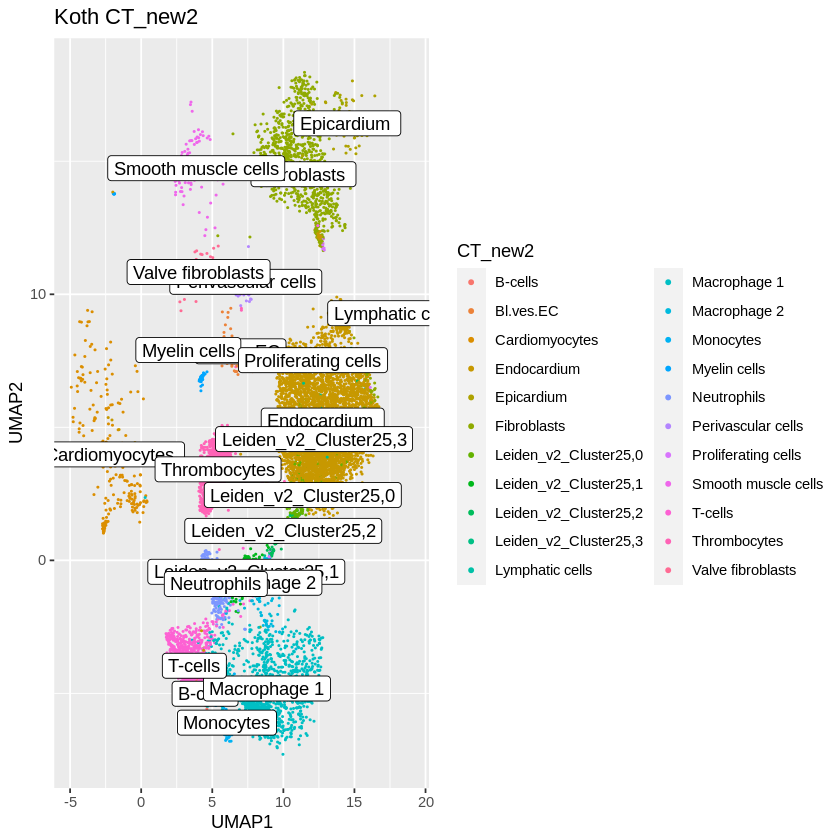

In [56]:
library(ggplot2)
dd = meta[colnames(sc$toc), ]
mids = aggregate(cbind(UMAP1, UMAP2) ~ CT_new2, data = dd, FUN = mean)
gg = ggplot(dd, aes(UMAP1, UMAP2)) + geom_point(aes(colour = CT_new2), size = 0.2) + 
    geom_label(data = mids, aes(label = CT_new2)) + ggtitle("Koth CT_new2") + 
    guides(colour = guide_legend(override.aes = list(size = 1)))
plot(gg)

In [57]:
table(sc$metaData$clusters)


              B-cells             Bl.ves.EC       Cardiomyocytes  
                   46                   116                   211 
         Endocardium            Epicardium           Fibroblasts  
                 4890                    54                  1030 
Leiden_v2_Cluster25,0 Leiden_v2_Cluster25,1 Leiden_v2_Cluster25,2 
                  137                   254                    50 
Leiden_v2_Cluster25,3       Lymphatic cells          Macrophage 1 
                   15                    21                  1347 
         Macrophage 2             Monocytes          Myelin cells 
                  236                    75                    39 
          Neutrophils    Perivascular cells   Proliferating cells 
                  271                   165                    13 
  Smooth muscle cells               T-cells          Thrombocytes 
                   77                  1253                  2495 
    Valve fibroblasts 
                   43 

In [58]:
saveRDS(sc,'./write/Koth_SoupX.rds')

# Predict contamination probability

## kdrl

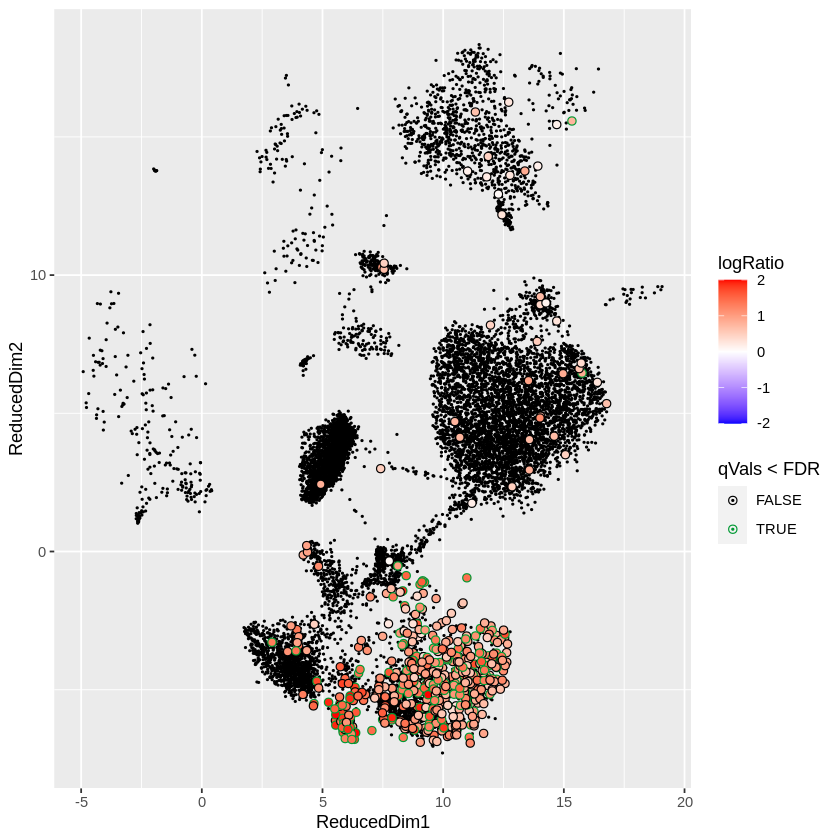

In [87]:
gg = plotMarkerMap(sc, "mpeg1.1")
plot(gg)

In [139]:
nonExpressedGeneList = list(GL = 'mpeg1.1')

2216 genes passed tf-idf cut-off and 937 soup quantile filter.  Taking the top 100.

Using 1243 independent estimates of rho.

Estimated global rho of 0.02



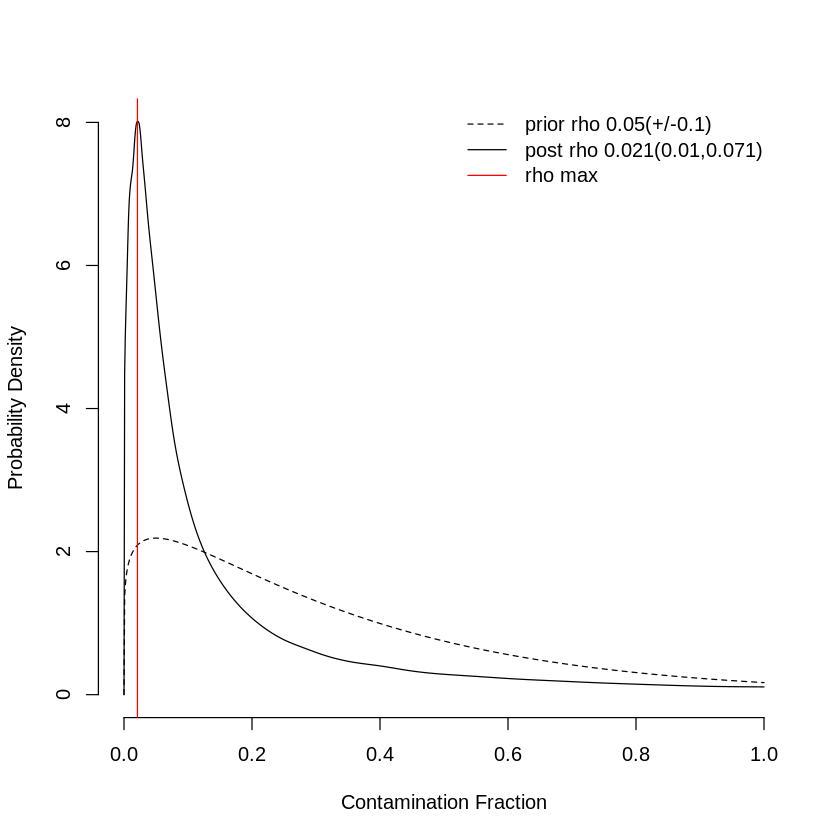

In [89]:
sc = autoEstCont(sc)

# Manually define clusters for calculation

In [140]:
useToEst2 = estimateNonExpressingCells(sc, nonExpressedGeneList = nonExpressedGeneList, 
    clusters = sc$metaData$CT_new2)

In [141]:
table(useToEst2)

useToEst2
FALSE  TRUE 
 2965  9873 

In [ ]:
filter@meta.data$useToEst2 <- useToEst2

VlnPlot(filter,features = nonExpressedGeneList$GL,group.by = 'useToEst2')

In [143]:
sc = calculateContaminationFraction(sc, nonExpressedGeneList, useToEst = useToEst2)

Estimated global contamination fraction of 3.68%



In [101]:
umap = meta[,c('UMAP1','UMAP2')]

In [102]:
filter[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(umap), key = "UMAP", assay = DefaultAssay(filter))

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP to UMAP_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_"


In [138]:
library(ggpubr)
library(patchwork)

gene1=nonExpressedGeneList$GL
gene2='useToEst2'
group='CT_new2'

plot1 <- FeaturePlot(filter, features = c(gene1), pt.size = 0.5,)
plot2 <- FeaturePlot(filter, features = c(gene2), pt.size = 0.5)
plot3 <- DimPlot(filter,group.by = group)

p <- plot1+plot2
ggsave(paste0("Koth_",gene1,".png"),p,height = 8,width = 5,units = "in")

# Adjust counts
## (simulation)

In [144]:
out = adjustCounts(sc)

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
"'giveCsparse' is deprecated; setting repr="T" for you"
Expanding counts from 22 clusters to 12838 cells.



In [ ]:
cntSoggy = rowSums(sc$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

In [148]:
saveRDS(sc,'write/Koth_SoupX_processed.rds')


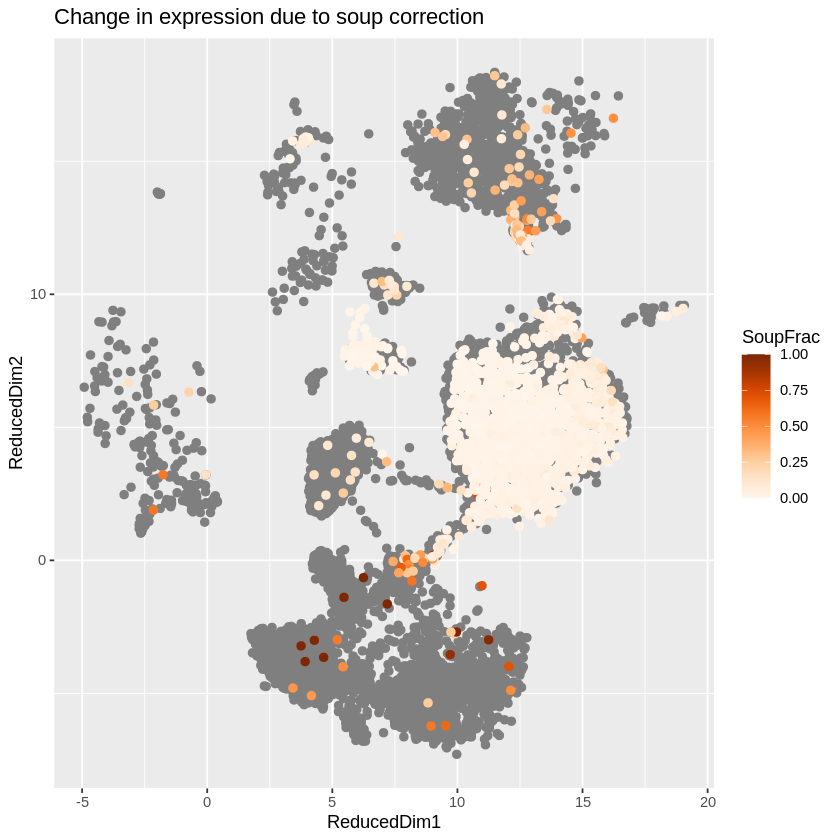

In [150]:
plotChangeMap(sc, out, "kdrl",pointSize = 2,)

In [347]:
srat = CreateSeuratObject(out)

In [348]:
srat

An object of class Seurat 
20450 features across 12838 samples within 1 assay 
Active assay: RNA (20450 features, 0 variable features)
 2 layers present: counts, data